# Credit card Fraud Detection (Handling Imbalanced dataset using ML)

## Importing Packages

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from termcolor import colored as cl 
import itertools 
import seaborn as sns
import scipy.stats as stats
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler # data normalization

from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm

from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import recall_score # evaluation metric
from sklearn.metrics import precision_score # evaluation metric 
from sklearn.metrics import precision_recall_curve # evaluation metric 

## Importing Data

In [3]:
dataset = pd.read_csv('creditcard.csv')
print("Dataset imported successfully")
dataset.drop('Time', axis = 1, inplace = True)
dataset.info()

Dataset imported successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non

## Exploratory Data Analysis

In [4]:
dataset.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [5]:
dataset.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
dataset.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Histogram for all features of dataset

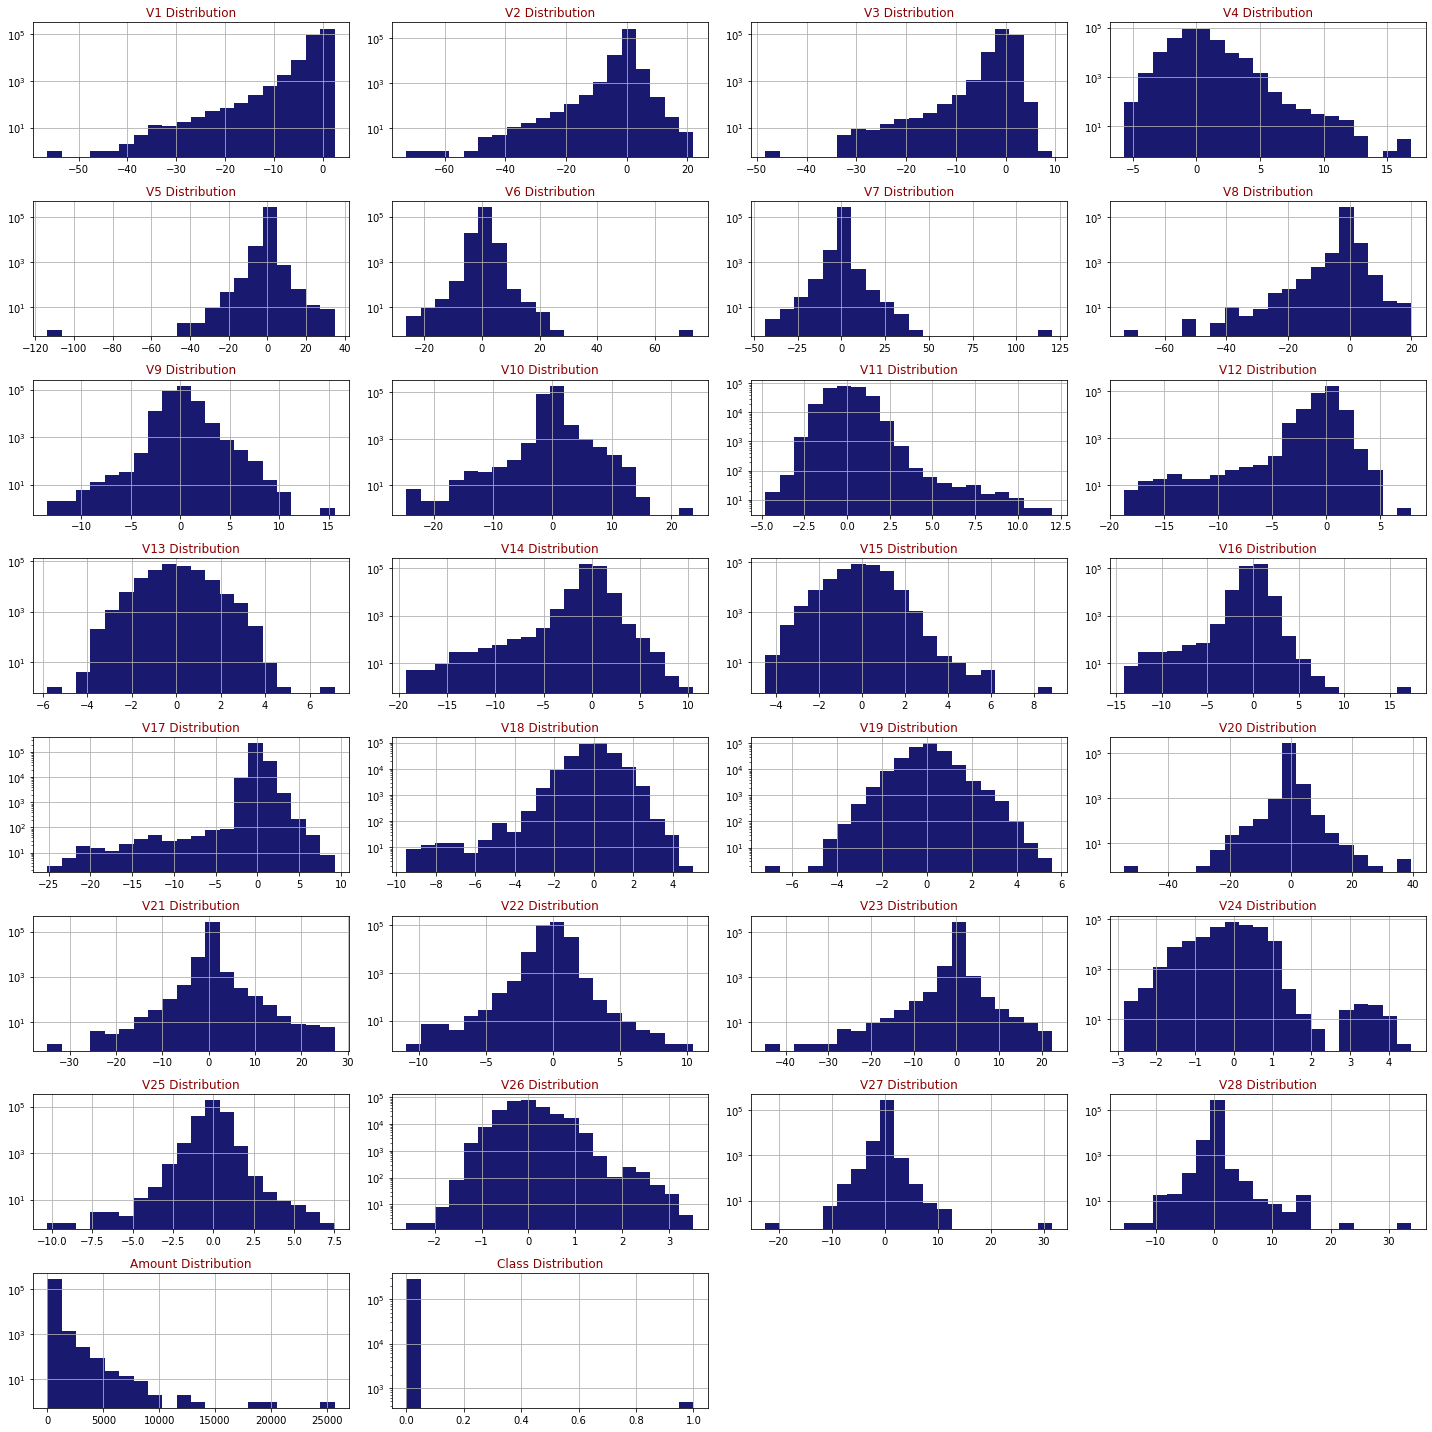

In [9]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(dataset,dataset.columns,8,4)

In [10]:
print(dataset["Class"].value_counts())

0    284315
1       492
Name: Class, dtype: int64


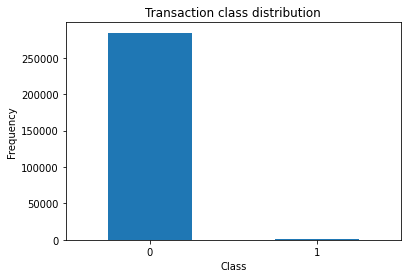

In [11]:
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

###### Class is highly imbalanced. Generally, in fraud detection, class imbalance is very common.

Pie Chart:


Text(0, 0.5, '')

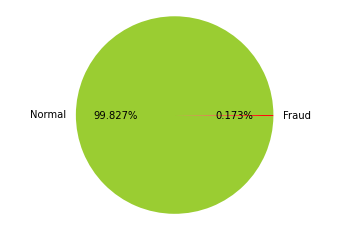

In [12]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud

print("Pie Chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(dataset.Class.value_counts(),autopct='%1.3f%%', labels=['Normal','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

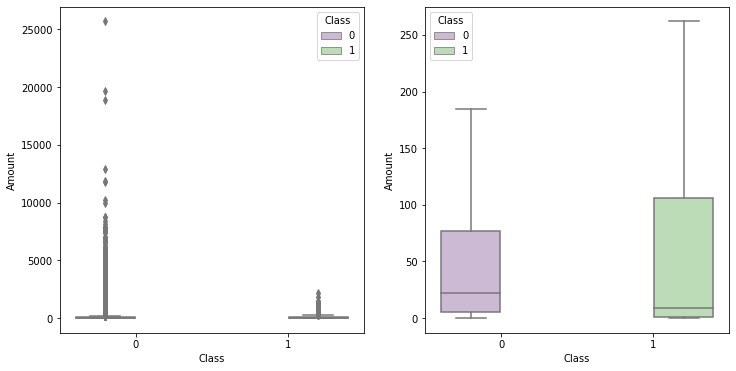

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=dataset, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=dataset, palette="PRGn",showfliers=False)
plt.show();

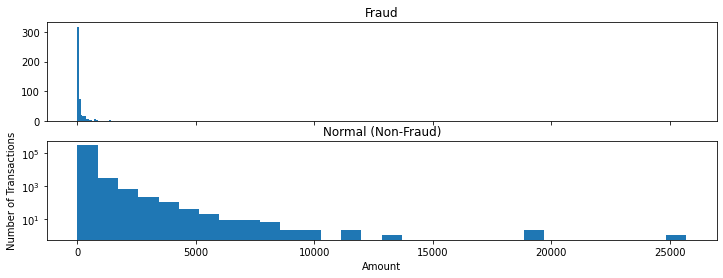

In [14]:
# now checking Amount in case of Fraud and Normal Transaction compared according to Number of transactions.

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

axis_1.hist(dataset.Amount[dataset.Class == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(dataset.Amount[dataset.Class == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale("log")
plt.show()

# we can see here that fraud transactions are of smaller amount. but this cant be used solely because normal transactions 
# too have a lot of transactions of smaller amount. so this kind of helps in a sense that we can say that if the amount
# is not large then its 'probably' not a fraud transaction, but obviously, fraud and normal transactions cant be 
# distinguished only according to amount.

### Correlation Matrix

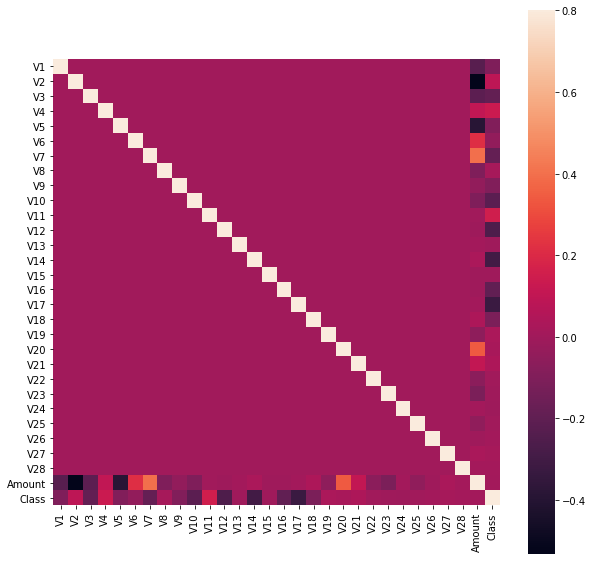

In [15]:
corrmat = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat , vmax=0.8 , square=True)
plt.show()

In [18]:
normal = dataset.loc[dataset['Class'] == 0]
fraud = dataset.loc[dataset['Class'] == 1]

In [19]:
cases = len(dataset)
normal_count = len(normal)
fraud_count = len(fraud)
fraud_percentage = round(fraud_count/normal_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(normal_count), attrs = ['bold']))
print(cl('Number of fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))


CASE COUNT
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of fraud cases are 492
Percentage of fraud cases is 0.17


In [20]:
print(cl('\n NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(normal.Amount.describe())



 NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [21]:
print(cl('\n FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud.Amount.describe())


 FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


#### Amount Data Normalization

In [22]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
amount = dataset['Amount'].values

dataset['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(dataset['Amount'].head(10), attrs = ['bold']))


0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


## Data Split

In [24]:

from sklearn.model_selection import train_test_split 

X = dataset.drop('Class', axis = 1).values
y = dataset['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


## Logistic Regression

### Cross Validation Like KFOLD and Hyperpaqrameter Tuning - Logistics Regression

In [25]:
from sklearn.model_selection import KFold

In [26]:
log_class = LogisticRegression()

# Hyperparameters
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

# KFold
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [28]:
lr=GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
lr.fit(X_train,y_train)

c:\users\sakam\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.85007834        nan 0.86042006        nan 0.86191018
        nan 0.86191018        nan 0.86191018]
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [29]:
lr_ypred = lr.predict(X_test)


### Confusion Matrix for logistc regression

<AxesSubplot:>

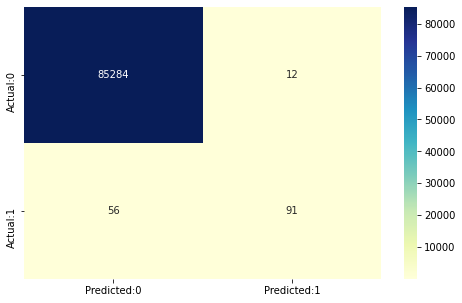

In [30]:
from sklearn.metrics import confusion_matrix # evaluation metric
cm=confusion_matrix(y_test,lr_ypred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Calculation of True Positive rate and False Positive Rate for kNN

### Calculation of True Positive rate and False Positive Rate for Logistic Regression

In [38]:
#function to calculate tp rate, fp rate
def tprate_fprate(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    TPrate = 0
    FPrate = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==0:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==1:
           TN += 1
    TPrate = TP/(TP+FN)
    FPrate = FP/(FP+TN)
    return(TPrate,FPrate)

In [33]:
lrTPrate, lrFPrate = tprate_fprate(y_test, lr_ypred)
print("True Positive rate is: ",lrTPrate)
print("FalsePositive rate is: ",lrFPrate)

True Positive rate is:  0.9998593134496342
FalsePositive rate is:  0.38095238095238093


### Accuracy score

In [34]:
from sklearn.metrics import accuracy_score # evaluation metric
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_ypred)), attrs = ['bold'], color = 'red'))


ACCURACY SCORE
Accuracy score of the Logistic Regression model is 0.999204147794436


### F1 score

In [35]:
from sklearn.metrics import f1_score # evaluation metric

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_ypred)), attrs = ['bold'], color = 'red'))


F1 SCORE
F1 score of the Logistic Regression model is 0.728


### Recall score

In [36]:
print(cl('Recall', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, lr_ypred)), attrs = ['bold'], color = 'red'))

Recall
Recall score of the Logistic Regression model is 0.6190476190476191


### Precision score

In [37]:
print(cl('Precision', attrs = ['bold']))
print(cl('Precision score of the Logistic Regression model is {}'.format(precision_score(y_test, lr_ypred)), attrs = ['bold'], color = 'red'))

Precision
Precision score of the Logistic Regression model is 0.883495145631068


#### Calculating AUC score and plotting ROC curve

In [39]:
# Function to plot roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

In [40]:
lr_pred_test_prob = lr.predict_proba(X_test)[:, 1]

In [41]:
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_pred_test_prob)

In [42]:
lr_auc = roc_auc_score(y_test, lr_pred_test_prob)
lr_auc

0.9689625052797334

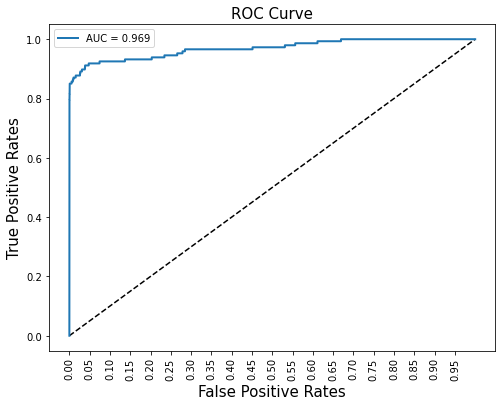

In [43]:
plot_roc_curve(fpr=lr_fpr, tpr=lr_tpr, label="AUC = %.3f" % lr_auc)

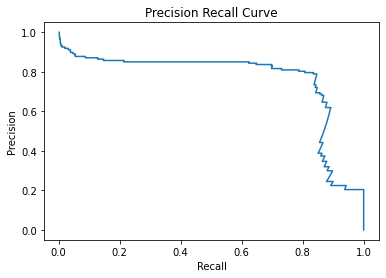

In [44]:
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, lr_pred_test_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

### Classification report for Logistic Regression

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



## K-Nearest Neighbors Algorithm

In [46]:
n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

### Confusion Matrix for knn classifier

<AxesSubplot:>

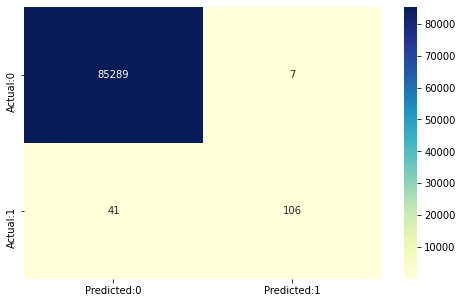

In [47]:
from sklearn.metrics import confusion_matrix # evaluation metric
import seaborn as sns
cm=confusion_matrix(y_test,knn_yhat)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [48]:
knnTPrate, knnFPrate = tprate_fprate(y_test, knn_yhat)
print("True Positive rate is: ",knnTPrate)
print("FalsePositive rate is: ",knnFPrate)

True Positive rate is:  0.9999179328456199
FalsePositive rate is:  0.2789115646258503


### Accuracy score

In [49]:
from sklearn.metrics import accuracy_score # evaluation metric
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))

ACCURACY SCORE
Accuracy score of the KNN model is 0.9994382219725431


### F1 score

In [50]:
from sklearn.metrics import f1_score # evaluation metric

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))

F1 SCORE
F1 score of the KNN model is 0.8153846153846154


In [51]:
print(cl('Recall', attrs = ['bold']))
print(cl('Recall score of the kNN model is {}'.format(recall_score(y_test, knn_yhat)), attrs = ['bold'], color = 'red'))

Recall
Recall score of the kNN model is 0.7210884353741497


In [52]:
print(cl('Precision', attrs = ['bold']))
print(cl('Precision score of the kNN model is {}'.format(precision_score(y_test, knn_yhat)), attrs = ['bold'], color = 'red'))

Precision
Precision score of the kNN model is 0.9380530973451328


In [53]:
knn_pred_test_prob = knn.predict_proba(X_test)[:, 1]

In [54]:
knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_pred_test_prob)

In [55]:
knn_auc = roc_auc_score(y_test, knn_pred_test_prob)
knn_auc

0.9250495593097489

### Receiver Operating Characteristic curve for kNN

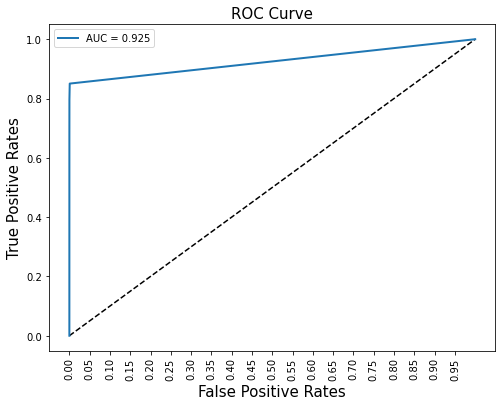

In [57]:
plot_roc_curve(fpr=knn_fpr, tpr=knn_tpr, label="AUC = %.3f" % knn_auc)

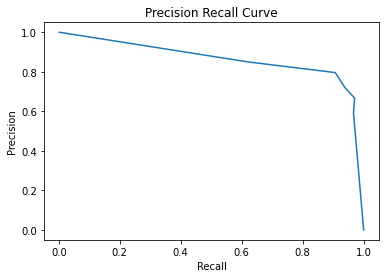

In [58]:
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, knn_pred_test_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

### Classification report for knn

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.72      0.82       147

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



## Support Vector Machine

In [60]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

<AxesSubplot:>

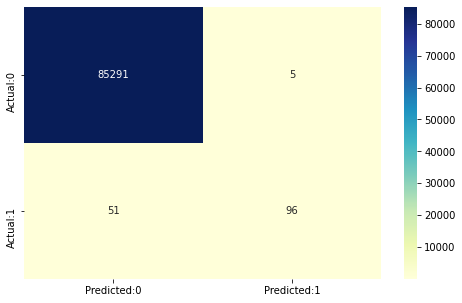

In [61]:
cm=confusion_matrix(y_test,svm_yhat)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [62]:
svmTPrate, svmFPrate = tprate_fprate(y_test, svm_yhat)
print("True Positive rate is: ",svmTPrate)
print("FalsePositive rate is: ",svmFPrate)

True Positive rate is:  0.9999413806040143
FalsePositive rate is:  0.3469387755102041


In [63]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold'], color = 'red'))


ACCURACY SCORE
Accuracy score of the SVM model is 0.9993445923013002


In [64]:
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('F1 score of the SVM is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold'], color = 'red'))


F1 SCORE
F1 score of the SVM is 0.7741935483870969


In [65]:
print(cl('Recall', attrs = ['bold']))
print(cl('Recall score of the SVM model is {}'.format(recall_score(y_test, svm_yhat)), attrs = ['bold'], color = 'red'))

Recall
Recall score of the SVM model is 0.6530612244897959


In [66]:
print(cl('Precision', attrs = ['bold']))
print(cl('Precision score of the SVM model is {}'.format(precision_score(y_test, svm_yhat)), attrs = ['bold'], color = 'red'))

Precision
Precision score of the SVM model is 0.9504950495049505


#### Calculating AUC score and plotting ROC curve

In [67]:
# calculate AUC
auc_score = roc_auc_score(y_test, svm_yhat)
print('AUC: %.3f' % auc_score)
# calculate roc curve
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_yhat)



AUC: 0.827


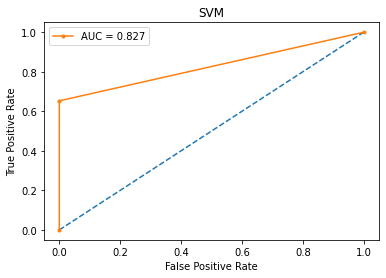

In [68]:
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_fpr, svm_tpr, marker='.', label="AUC = %.3f" % auc_score)
plt.title('SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

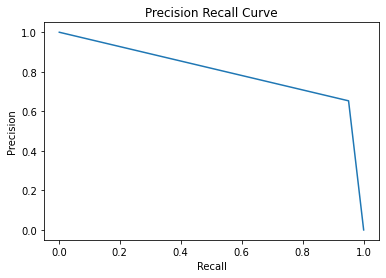

In [69]:
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, svm_yhat)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [70]:
print(classification_report(y_test,svm_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.65      0.77       147

    accuracy                           1.00     85443
   macro avg       0.97      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443



## Decision Trees

In [71]:
#tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
#tree_model.fit(X_train, y_train)
#tree_yhat = tree_model.predict(X_test)
tree_model = DecisionTreeClassifier(random_state = 0,
                                    criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

<AxesSubplot:>

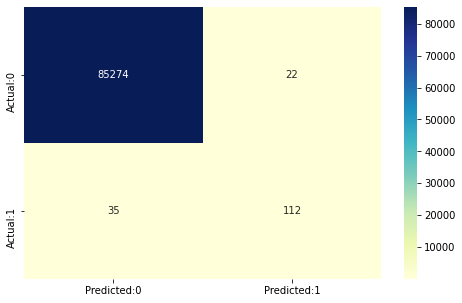

In [72]:
cm=confusion_matrix(y_test,tree_yhat)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [73]:
treeTPrate, treeFPrate = tprate_fprate(y_test, tree_yhat)
print("True Positive rate is: ",treeTPrate)
print("FalsePositive rate is: ",treeFPrate)

True Positive rate is:  0.9997420746576627
FalsePositive rate is:  0.23809523809523808


In [74]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold'], color = 'red'))


ACCURACY SCORE
Accuracy score of the Decision Tree model is 0.9993328885923949


In [75]:
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold'], color = 'red'))


F1 SCORE
F1 score of the Decision Tree model is 0.797153024911032


In [76]:
print(cl('Recall', attrs = ['bold']))
print(cl('Recall score of the Decision Tree model is {}'.format(recall_score(y_test, tree_yhat)), attrs = ['bold'], color = 'red'))

Recall
Recall score of the Decision Tree model is 0.7619047619047619


In [77]:
print(cl('Precision', attrs = ['bold']))
print(cl('Precision score of the Decision Tree model is {}'.format(precision_score(y_test, tree_yhat)), attrs = ['bold'], color = 'red'))

Precision
Precision score of the Decision Tree model is 0.835820895522388


#### Calculating AUC score and plotting ROC curve

In [78]:
dt_pred_test_prob = tree_model.predict_proba(X_test)[:, 1]

In [79]:
dt_fpr, dt_tpr, threshold = roc_curve(y_test, dt_pred_test_prob)

In [80]:
dt_auc = roc_auc_score(y_test, dt_pred_test_prob)
dt_auc

0.8808234182812124

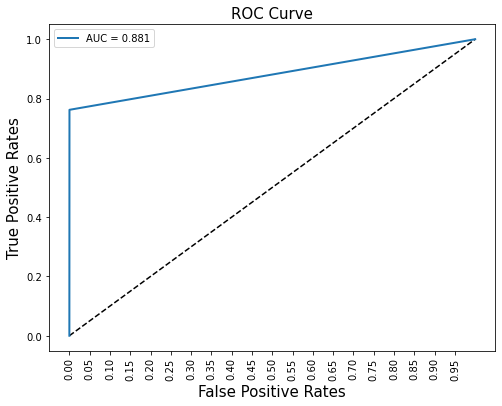

In [81]:
plot_roc_curve(fpr=dt_fpr, tpr=dt_tpr, label="AUC = %.3f" % dt_auc)

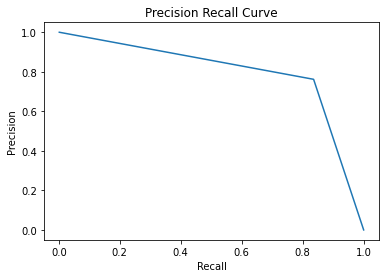

In [82]:
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, dt_pred_test_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [83]:
print(classification_report(y_test,tree_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.76      0.80       147

    accuracy                           1.00     85443
   macro avg       0.92      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



## Naive bias

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_yhat = nb.predict(X_test)

<AxesSubplot:>

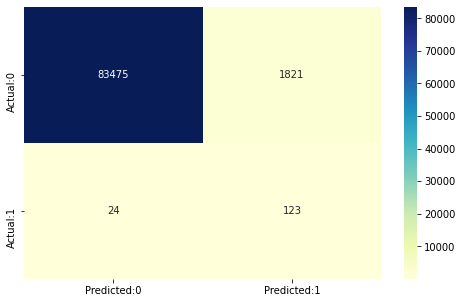

In [86]:
cm=confusion_matrix(y_test,nb_yhat)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [87]:
treeTPrate, treeFPrate = tprate_fprate(y_test, nb_yhat)
print("True Positive rate is: ",treeTPrate)
print("FalsePositive rate is: ",treeFPrate)

True Positive rate is:  0.9786508159819921
FalsePositive rate is:  0.16326530612244897


In [88]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('Accuracy score of the Naive Bayes model is {}'.format(accuracy_score(y_test, nb_yhat)), attrs = ['bold'], color = 'red'))


ACCURACY SCORE
Accuracy score of the Naive Bayes model is 0.9784066570696254


In [89]:
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('F1 score of the Naive Bayes model is {}'.format(f1_score(y_test, nb_yhat)), attrs = ['bold'], color = 'red'))


F1 SCORE
F1 score of the Naive Bayes model is 0.11764705882352942


In [90]:
print(cl('Recall', attrs = ['bold']))
print(cl('Recall score of the Naive Bayes model is {}'.format(recall_score(y_test, nb_yhat)), attrs = ['bold'], color = 'red'))

Recall
Recall score of the Naive Bayes model is 0.8367346938775511


In [91]:
print(cl('Precision', attrs = ['bold']))
print(cl('Precision score of the Naive Bayes model is {}'.format(precision_score(y_test, nb_yhat)), attrs = ['bold'], color = 'red'))

Precision
Precision score of the Naive Bayes model is 0.06327160493827161


#### Calculating AUC score and plotting ROC curve

In [92]:
nb_pred_test_prob = nb.predict_proba(X_test)[:, 1]

In [93]:
nb_fpr, nb_tpr, threshold = roc_curve(y_test, nb_pred_test_prob)

In [94]:
nb_auc = roc_auc_score(y_test, nb_pred_test_prob)
nb_auc

0.9589472020284385

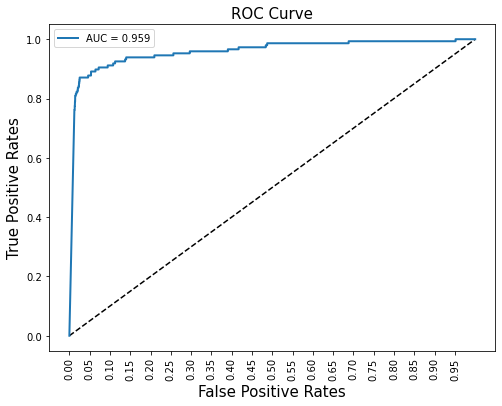

In [95]:
plot_roc_curve(fpr=nb_fpr, tpr=nb_tpr, label="AUC = %.3f" % nb_auc)

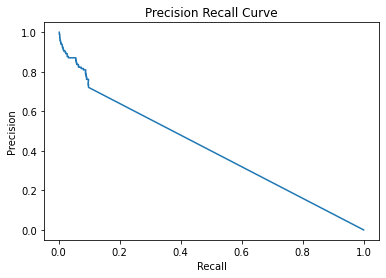

In [96]:
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, nb_pred_test_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [97]:
print(classification_report(y_test,nb_yhat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.84      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



## Random Forest

In [133]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [134]:
y_pred = rf.predict(X_test)

<AxesSubplot:>

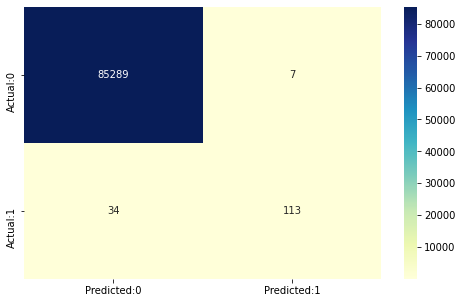

In [135]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [136]:
treeTPrate, treeFPrate = tprate_fprate(y_test, y_pred)
print("True Positive rate is: ",treeTPrate)
print("FalsePositive rate is: ",treeFPrate)

True Positive rate is:  0.9999179328456199
FalsePositive rate is:  0.23129251700680273


In [137]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, y_pred)), attrs = ['bold'], color = 'red'))


ACCURACY SCORE
Accuracy score of the Random Forest model is 0.9995201479348805


In [138]:
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('F1 score of the Random Forest model is {}'.format(f1_score(y_test, y_pred)), attrs = ['bold'], color = 'red'))


F1 SCORE
F1 score of the Random Forest model is 0.846441947565543


In [139]:
print(cl('Recall', attrs = ['bold']))
print(cl('Recall score of the Random Forest model is {}'.format(recall_score(y_test, y_pred)), attrs = ['bold'], color = 'red'))


Recall
Recall score of the Random Forest model is 0.7687074829931972


In [140]:
print(cl('Precision', attrs = ['bold']))
print(cl('Precision score of the Random Forest model is {}'.format(precision_score(y_test, y_pred)), attrs = ['bold'], color = 'red'))


Precision
Precision score of the Random Forest model is 0.9416666666666667


#### Calculating AUC score and plotting ROC curve

In [141]:
rf_pred_test_prob = rf.predict_proba(X_test)[:, 1]

In [142]:
rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf_pred_test_prob)

In [143]:
rf_auc = roc_auc_score(y_test, rf_pred_test_prob)
rf_auc

0.9371574952434547

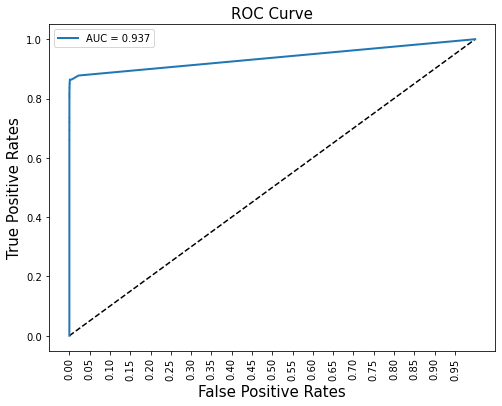

In [144]:
plot_roc_curve(fpr=rf_fpr, tpr=rf_tpr, label="AUC = %.3f" % rf_auc)

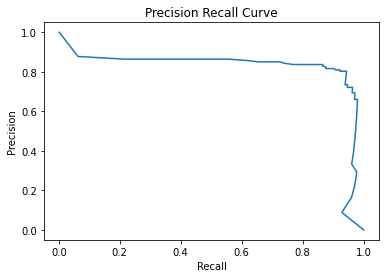

In [145]:
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, rf_pred_test_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## Random Forest with Oversampling

In [147]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [148]:
os = RandomOverSampler(0.75)

X_train_ns, y_train_ns = os.fit_resample(X_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199019, 1: 345})
The number of classes after fit Counter({0: 199019, 1: 149264})


c:\users\sakam\appdata\local\programs\python\python39\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


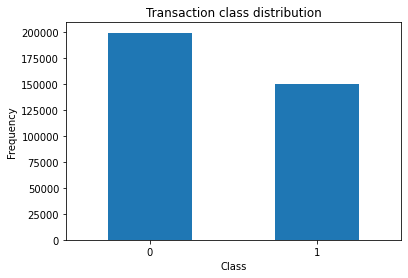

In [149]:
count_classes = pd.value_counts(y_train_ns, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [150]:
os_rf = RandomForestClassifier()

os_rf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [153]:
y_pred = os_rf.predict(X_test)

<AxesSubplot:>

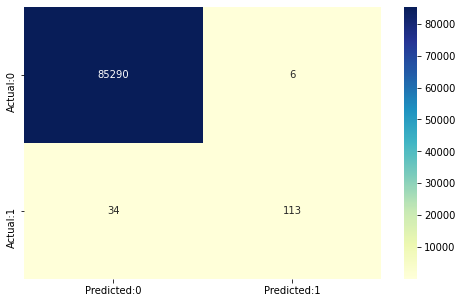

In [154]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [155]:
treeTPrate, treeFPrate = tprate_fprate(y_test, y_pred)
print("True Positive rate is: ",treeTPrate)
print("FalsePositive rate is: ",treeFPrate)

True Positive rate is:  0.9999296567248172
FalsePositive rate is:  0.23129251700680273


In [156]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, y_pred)), attrs = ['bold'], color = 'red'))


ACCURACY SCORE
Accuracy score of the Random Forest model is 0.9995318516437859


In [157]:
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('F1 score of the Random Forest model is {}'.format(f1_score(y_test, y_pred)), attrs = ['bold'], color = 'red'))

F1 SCORE
F1 score of the Random Forest model is 0.849624060150376


In [158]:
print(cl('Recall', attrs = ['bold']))
print(cl('Recall score of the Random Forest model is {}'.format(recall_score(y_test, y_pred)), attrs = ['bold'], color = 'red'))

Recall
Recall score of the Random Forest model is 0.7687074829931972


In [159]:
print(cl('Precision', attrs = ['bold']))
print(cl('Precision score of the Random Forest model is {}'.format(precision_score(y_test, y_pred)), attrs = ['bold'], color = 'red'))

Precision
Precision score of the Random Forest model is 0.9495798319327731


#### Calculating AUC score and plotting ROC curve

In [160]:
os_pred_test_prob = os_rf.predict_proba(X_test)[:, 1]

In [161]:
os_fpr, os_tpr, threshold = roc_curve(y_test, os_pred_test_prob)

In [162]:
os_auc = roc_auc_score(y_test, os_pred_test_prob)
os_auc

0.9439118054837767

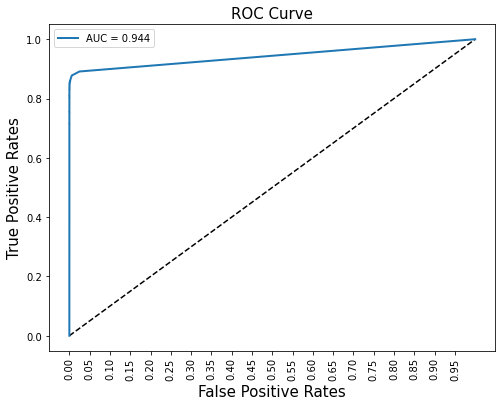

In [163]:
plot_roc_curve(fpr=os_fpr, tpr=os_tpr, label="AUC = %.3f" % os_auc)

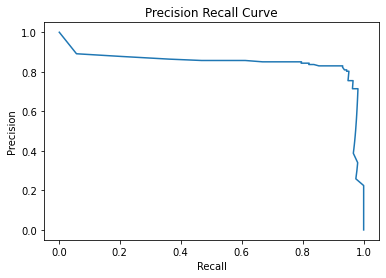

In [164]:
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, os_pred_test_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [165]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



### ROC for all algorithms in a single plot

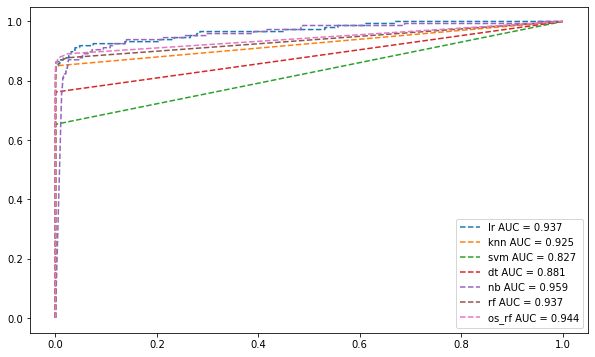

In [166]:
plt.figure(figsize=(10,6))
plt.plot(lr_fpr,lr_tpr, linestyle='--', label='lr AUC = %.3f' % rf_auc)
plt.plot(knn_fpr,knn_tpr, linestyle='--', label='knn AUC = %.3f' % knn_auc)
plt.plot(svm_fpr,svm_tpr, linestyle='--', label='svm AUC = %.3f' % auc_score)
plt.plot(dt_fpr,dt_tpr, linestyle='--', label='dt AUC = %.3f' % dt_auc)
plt.plot(nb_fpr,nb_tpr, linestyle='--', label='nb AUC = %.3f' % nb_auc)
plt.plot(rf_fpr,rf_tpr, linestyle='--', label='rf AUC = %.3f' % rf_auc)
plt.plot(os_fpr,os_tpr, linestyle='--', label='os_rf AUC = %.3f' % os_auc)
plt.legend()

## Data Transformation 

### Feature selection by using Filtering Method

In [167]:
correlated_features = set()
x = dataset.drop(["Class"],axis=1)
correlation_matrix = x.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

set()


#### For '0.8' the features are not much correlated among them. In this case we get an empty correlation matrix, which means no two features in our dataset have correlation greater than 0.8. So, we are not dropping any feature from our original dataset.
